In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression

# Data Preprocessing

## Test data

In [ ]:
test_raw = pd.read_csv('data/test.psv', delimiter='|')

In [ ]:
# trim column names
test_raw.columns = [key.strip() for key in test_raw.keys()]

In [ ]:
test_raw.keys()

In [ ]:
# remove unrelated columns
# TITLE: title, TSTOBJ: test objective, VERNO: doc version,  CONNO: contract no,
# TSTREF: ref assigned by test performer, RECTYP: type of recorder,
# LINK: link to RECTYP, TOTCRY: no idea, TSTCOM: test comments
test_data = test_raw.drop(['TITLE', 'TSTOBJ', 'VERNO', 'CONNO', 'TSTREF', 'RECTYP',
                 'RECTYPD', 'LINK', 'LINKD', 'TOTCRV', 'TSTCOM'], axis=1)

# remove col repetitions, drop short name, keep long name
test_data = test_data.drop(['TSTPRF', 'TSTTYP', 'TSTCFN', 'TKSURF', 'TKCOND'], axis=1)

In [ ]:
# convert TSTDAT to date format
test_data['TSTDAT'] = pd.to_datetime(test_data['TSTDAT'], format="%Y-%m-%d")

In [ ]:
test_data.head()

In [ ]:
test_data.info()

In [ ]:
test_data.shape

In [ ]:
# replace Unknown values with np.nan
test_data.loc[test_data['TSTTYPD'] == 'UNKNOWN', 'TSTTYPD'] = np.nan
test_data.loc[test_data['TSTCFND'] == 'NO VALUE', 'TSTCFND'] = np.nan
test_data.loc[test_data['TKSURFD'] == 'UNKNOWN', 'TKSURFD'] = np.nan
test_data.loc[test_data['TKCONDD'] == 'UNKNOWN', 'TKCONDD'] = np.nan

In [ ]:
# Removing outliers acc to doc
# -99 < TEMP < 99
#test_data = test_data[(test_data['TEMP'] > -99) & (test_data['TEMP'] < 99)]
#print(test_data.shape)

In [ ]:
test_data.describe()

## Vehicle data

In [ ]:
veh_raw = pd.read_csv('data/veh.psv', delimiter='|')

In [ ]:
# trim column names
veh_raw.columns = [key.strip() for key in veh_raw.keys()]

In [ ]:
veh_raw.head()

In [ ]:
# remove unrelated cols
# ENGDSP, 
veh_data = veh_raw.drop(['NHTSANO', 'VIN', 'MODINDD', 'MODDSC', 'VDI', 'VEHCOM'], axis=1)
# remove col repetitions
veh_data = veh_data.drop(['MAKE', 'MODEL', 'BODY', 'ENGINE', 'TRANSM', 'STRSEP', 'COLMEC', 'MODIND',
                          'BMPENG', 'SILENG', 'APLENG'], axis=1)

In [ ]:
veh_data.keys()

In [ ]:
veh_data['APLENGD'].unique()

In [ ]:
# convert unknowns to np.nan, fix typos
veh_data.loc[veh_data['BODYD'] == 'UN-DEFINED', 'BODYD'] = np.nan
veh_data.loc[veh_data['ENGINED'] == 'NOT APLLICABLE', 'ENGINED'] = 'NOT APPLICABLE'
veh_data.loc[veh_data['ENGINED'] == 'UNKNOWN', 'ENGINED'] = np.nan
veh_data.loc[veh_data['TRANSMD'] == 'UNKNOWN', 'TRANSMD'] = np.nan
veh_data.loc[veh_data['TRANSMD'] == '.', 'TRANSMD'] = np.nan
veh_data.loc[veh_data['STRSEPD'] == 'UNKNOWN', 'STRSEPD'] = np.nan
veh_data.loc[veh_data['STRSEPD'] == 'NOT APLLICABLE', ''] = 'NOT APPLICABLE'
veh_data.loc[veh_data['COLMECD'] == 'UNKNOWN', 'COLMECD'] = np.nan
veh_data.loc[veh_data['BMPENGD'] == 'UNKNOWN', 'BMPENGD'] = np.nan
veh_data.loc[veh_data['BMPENGD'] == '.', 'BMPENGD'] = np.nan
veh_data.loc[veh_data['BMPENGD'] == 'NOT DEFINED', 'BMPENGD'] = np.nan
veh_data.loc[veh_data['SILENGD'] == 'UNKNOWN', 'SILENGD'] = np.nan
veh_data.loc[veh_data['SILENGD'] == '.', 'SILENGD'] = np.nan
veh_data.loc[veh_data['APLENGD'] == 'UNKNOWN', 'APLENGD'] = np.nan
veh_data.loc[veh_data['APLENGD'] == '.', 'APLENGD'] = np.nan

In [ ]:
veh_data.describe()

In [ ]:
# check percentage of car makers
# get percentage
make_shares = {x: (veh_data[veh_data['MAKED'] == x].shape[0] / veh_data.shape[0]) * 100
               for x in veh_data['MAKED'].unique()}
# get manufacturers with > 2% of share
top_make = {x: make_shares[x] for x in make_shares.keys() if (make_shares[x] >= 1.5) & (make_shares[x] < 20) 
                                                                & (x != 'OTHER')}
# add the rest of shares to OTHER
#other_shares = np.sum([make_shares[x] for x in make_shares.keys() if make_shares[x] < 1.5])
#top_make['OTHER'] = top_make['OTHER'] + other_shares

In [ ]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3,0,1,1)

theme = plt.get_cmap('bwr')
#ax1.set_prop_cycle("color", [theme(2. * i / len(sizes)) for i in range(len(sizes))])
shares = [top_make[x] for x in top_make.keys()]
_ = ax1.pie(shares, startangle=90, labels=[x for x in top_make.keys()])

ax1.axis('equal')

total = 100
plt.legend(
    loc='upper right',
    labels=[f"{x}: {round(top_make[x], 1)}%" for x in top_make.keys()],
    prop={'size': 15},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure,
    title="Top car makers tested"
)

plt.show()

In [ ]:
# check percentage of car models
# get percentage
model_shares = {x: (veh_data[veh_data['MODELD'] == x].shape[0] / veh_data.shape[0]) * 100
               for x in veh_data['MODELD'].unique()}
# get top models
top_models = {x: model_shares[x] for x in model_shares.keys() if (model_shares[x] >= 0.7) & (model_shares[x] <= 10)
                                                                     & (x != 'OTHER')}

In [ ]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3,0,1,1)

theme = plt.get_cmap('bwr')
#ax1.set_prop_cycle("color", [theme(2. * i / len(sizes)) for i in range(len(sizes))])
shares = [top_models[x] for x in top_models.keys()]
_ = ax1.pie(shares, startangle=90, labels=[x for x in top_models.keys()])

ax1.axis('equal')

total = 100
plt.legend(
    loc='upper right',
    labels=[f"{x}: {round(top_models[x], 1)}%" for x in top_models.keys()],
    prop={'size': 15},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure,
    title="Top car makers tested"
)

plt.show()

## Barrier data

In [ ]:
bar_raw = pd.read_csv('data/bar.psv', delimiter='|')

In [ ]:
# trim column names
bar_raw.columns = [key.strip() for key in bar_raw.keys()]

In [ ]:
bar_raw.head()

In [ ]:
# remove unrelated cols
bar_data = bar_raw.drop(['BARCOM'], axis=1)
# remove col repetitions
bar_data = bar_data.drop(['BARRIG', 'BARSHP'], axis=1)

## Occupant data

In [ ]:
occ_raw = pd.read_csv('data/occ.psv', delimiter='|')

In [ ]:
# trim column names
occ_raw.columns = [key.strip() for key in occ_raw.keys()]

In [ ]:
occ_raw.keys()

In [ ]:
# remove unrelated cols
occ_data = occ_raw.drop(['OCCCOM', 'MTHCALD', 'DUMSIZD', 'DUMMAN', 'DUMMOD', 'DUMDSC'], axis=1)
# remove col repetitions
occ_data = occ_data.drop(['OCCLOC', 'OCCTYP', 'OCCSEX', 'MTHCAL', 'DUMSIZ', 'SEPOSN', 'CNTRH1',
                         'CNTRH2', 'CNTRC1', 'CNTRC2', 'CNTRL1', 'CTRL2'], axis=1)

In [ ]:
occ_data.keys()

In [ ]:
occ_data.loc[occ_data['OCCSEXD'] == 'UNKNOWN', 'OCCSEXD'] = np.nan
occ_data.loc[occ_data['OCCSEXD'] == 'A', 'OCCSEXD'] = np.nan
occ_data.loc[occ_data['SEPOSND'] == 'UNKNOWN', 'SEPOSND'] = np.nan
occ_data.loc[occ_data['SEPOSND'] == '.', 'SEPOSND'] = np.nan
occ_data.loc[occ_data['CNTRH1D'] == 'UNKNOWN', 'CNTRH1D'] = np.nan
occ_data.loc[occ_data['CNTRH1D'] == '', 'CNTRH1D'] = np.nan

In [ ]:
occ_data['OCCSEXD'].unique()

In [ ]:
occ_data['OCCSEXD'].value_counts().head(20).plot(kind='bar', title = 'Occupant sex distribution')

## UK data

In [2]:
df_uk_accidents = pd.read_csv('data/uk_accidents.csv', encoding = 'unicode_escape')
df_uk_vehicles = pd.read_csv('data/uk_vehicles.csv', encoding = 'unicode_escape')
df_uk_casualties = pd.read_csv('data/uk_casualties.csv', encoding = 'unicode_escape')
df_uk_makes = pd.read_csv('data/Vehicle_Information.csv', usecols = [0, 10, 11, 19], encoding = 'unicode_escape')

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Appending makes and models to the UK vehicles DF
if 'Vehicle_Make' not in df_uk_vehicles:
    df_uk_vehicles = pd.merge(df_uk_vehicles, df_uk_makes, on = ['Accident_Index', 'Vehicle_Reference'], how='left')
    
# Rename vehicle make, model to follow the same convention
df_uk_vehicles.rename(columns={'make': 'Vehicle_Make', 'model': 'Vehicle_Model'}, inplace = True)


# Mapping numeric values to corresponding text
df_uk_vehicles_map = {
    'Sex_of_Driver': {-1: np.nan, 3: np.nan, 2: 'Female', 1: 'Male'},
    'Age_Band_of_Driver': {-1: np.nan, 1: '0-5', 2: '6-10', 3: '11-15', 4: '16-20', 5: '21-25', 6: '26-35', 7: '36-45', 8: '46-55', 9: '56-65', 10: '66-75', 11: 'Over 75'}, 
    'Vehicle_Make': {'MISSING': np.nan},
    'Vehicle_Model': {'MISSING': np.nan},
    'Age_of_Vehicle': {-1: np.nan},
    '1st_Point_of_Impact': {-1: np.nan, 1: 'Front', 2: 'Back', 3: 'Offside', 4: 'Nearside'},
    'Vehicle_Manoeuvre': {-1: np.nan, 1: 'Reversing', 2: 'Parked', 3: 'Waiting to go - held up', 4: 'Slowing or stopping', 5: 'Moving off', 6: 'U-turn', 7: 'Turning left', 8: 'Waiting to turn left', 9: 'Turning right', 10: 'Waiting to turn right', 11: 'Changing lane to left', 12: 'Changing lane to right', 13: 'Overtaking moving vehicle – offside', 14: 'Overtaking static vehicle - offside', 15: 'Overtaking - nearside', 16: 'Going ahead left-hand bend', 17: 'Going ahead right-hand bend', 18: 'Going ahead other'},
    'Vehicle_Type': {-1: np.nan, 90: np.nan, 1: 'Pedal cycle', 2: 'Motorcycle <=50cc', 3: 'Motorcycle <=125cc', 4: 'Motorcycle 125cc-500cc', 5: 'Motorcycle >500cc', 8: 'Taxi/Private hire car', 9: 'Car', 10: 'Minibus (8-16 seats)', 11: 'Bus (>=17 seats)', 16: 'Ridden horse', 17: 'Agricultural vehicle', 18: 'Tram', 19: 'Van <=3.5 t.', 20: 'Goods 3.5t.-7.5t', 21: 'Goods >=7.5 t.', 22: 'Mobility scooter', 23: 'Electric motorcycle', 97: 'Motorcycle - unknown cc', 98: 'Goods vehicle - unknown weight'},
    'Vehicle_Location-Restricted_Lane': {-1: np.nan, 0: 'On main carriageway - not in restricted lane', 1: 'Tram/Light rail track', 2: 'Bus lane', 3:	'Busway (including guided busway)', 4: 'Cycle lane (on main carriageway)', 5: 'Cycleway or shared use footway (not part of  main carriageway)', 6: 'On lay-by or hard shoulder', 7:	'Entering lay-by or hard shoulder', 8:	'Leaving lay-by or hard shoulder', 9: 'Footway (pavement)', 10:	'Not on carriageway'},
    'Junction_Location': {-1: np.nan, 0: 'Not at or within 20 metres of junction', 1:	'Approaching junction or waiting/parked at junction approach', 2:	'Cleared junction or waiting/parked at junction exit', 3:	'Leaving roundabout', 4: 'Entering roundabout', 5: 'Leaving main road', 6: 'Entering main road', 7:	'Entering from slip road', 8:	'Mid Junction - on roundabout or on main road'},
    'Skidding_and_Overturning': {-1: np.nan, 0: 'None', 1: 'Skidded', 2: 'Skidded and overturned', 3:	'Jackknifed', 4: 'Jackknifed and overturned', 5: 'Overturned'},
    'Hit_Object_in_Carriageway': {-1: np.nan, 11: np.nan, 0: 'None', 1: 'Previous accident', 2: 'Road works', 4: 'Parked vehicle', 5:	'Bridge (roof)', 6:	'Bridge (side)', 7:	'Bollard or refuge', 8:	'Open door of vehicle', 9: 'Central island of roundabout', 10: 'Kerb', 12: 'Any animal (except ridden horse)'}, 
    'Vehicle_Leaving_Carriageway': {-1: np.nan, 0: 'Did not leave carriageway', 1: 'Nearside', 2:	'Nearside and rebounded', 3: 'Straight ahead at junction', 4: 'Offside on to central reservation', 5:	'Offside on to centrl res + rebounded', 6: 'Offside - crossed central reservation', 7: 'Offside', 8: 'Offside and rebounded'},
    'Hit_Object_off_Carriageway': {-1: np.nan, 10: np.nan, 0: 'None', 1: 'Road sign or traffic signal', 2: 'Lamp post', 3: 'Telegraph or electricity pole', 4: 'Tree', 5:	'Bus stop or bus shelter', 6:	'Central crash barrier', 7:	'Near/Offside crash barrier', 8: 'Submerged in water', 9: 'Entered ditch', 11: 'Wall or fence'},
    'Journey_Purpose_of_Driver' : {-1: np.nan, 5: np.nan, 6: np.nan, 15: np.nan, 1:	'Journey as part of work', 2:	'Commuting to/from work', 3: 'Taking pupil to/from school', 4: 'Pupil riding to/from school'},
    'Age_of_Driver': {-1: np.nan},
    'Engine_Capacity_(CC)': {-1: np.nan},
    'Propulsion_Code': {-1: np.nan, 1: 'Petrol', 2: 'Heavy oil', 3: 'Electric', 4:	'Steam', 5:	'Gas', 6:	'Petrol/Gas (LPG)', 7: 'Gas/Bi-fuel', 8: 'Hybrid electric', 9: 'Gas Diesel', 10: 'New fuel technology', 11:	'Fuel cells', 12:	'Electric diesel'},
    'Driver_Home_Area_Type': {-1: np.nan, 1: 'Urban area', 2:	'Small town', 3: 'Rural'}
}


df_uk_accidents_map = {
    'Accident_Severity': {-1: np.nan, 1: 'Fatal', 2: 'Serious', 3: 'Slight'},
    'Weather_Conditions': {-1: np.nan, 8: np.nan, 9: np.nan, 1: 'Fine no high winds', 2: 'Raining no high winds', 3: 'Snowing no high winds', 4: 'Fine + high winds', 5: 'Raining + high winds', 6: 'Snowing + high winds', 7: 'Fog or mist'},
    'Light_Conditions': {-1: np.nan, 1: 'Daylight', 4: 'Darkness - lights lit', 5: 'Darkness - lights unlit', 6: 'Darkness - no lighting', 7: 'Darkness - lighting unknown'},
    'Police_Force': {1:	'Metropolitan Police', 3: 'Cumbria', 4:	'Lancashire', 5: 'Merseyside', 6:	'Greater Manchester', 7: 'Cheshire', 10: 'Northumbria', 11:	'Durham', 12:	'North Yorkshire', 13: 'West Yorkshire', 14: 'South Yorkshire', 16:	'Humberside', 17:	'Cleveland', 20: 'West Midlands', 21:	'Staffordshire', 22: 'West Mercia', 23:	'Warwickshire', 30: 'Derbyshire', 31:	'Nottinghamshire', 32: 'Lincolnshire', 33:	'Leicestershire', 34:	'Northamptonshire', 35:	'Cambridgeshire', 36:	'Norfolk', 37: 'Suffolk', 40:	'Bedfordshire', 41:	'Hertfordshire', 42: 'Essex', 43:	'Thames Valley', 44: 'Hampshire', 45:	'Surrey', 46:	'Kent', 47:	'Sussex', 48:	'City of London', 50:	'Devon and Cornwall', 52:	'Avon and Somerset', 53: 'Gloucestershire', 54:	'Wiltshire', 55: 'Dorset', 60: 'North Wales', 61:	'Gwent', 62: 'South Wales', 63:	'Dyfed-Powys', 91: 'Northern', 92: 'Grampian', 93: 'Tayside', 94:	'Fife', 95:	'Lothian and Borders', 96: 'Central', 97:	'Strathclyde', 98: 'Dumfries and Galloway'},
    'Day_of_Week': {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'},
    '1st_Road_Class': {6: np.nan, 1: 'Motorway', 2: 'A(M)', 3:	'A', 4:	'B', 5: 'C'},
    'Road_Type': {-1: np.nan, 9: np.nan, 1: 'Roundabout', 2: 'One way street', 3: 'Dual carriageway', 6: 'Single carriageway', 7: 'Slip road', 12: 'One way street/Slip road'},
    'Junction_Detail': {-1: np.nan, 9: np.nan, 0: 'Not at junction or within 20 metres', 1:	'Roundabout', 2: 'Mini-roundabout', 3: 'T or staggered junction', 5: 'Slip road', 6: 'Crossroads', 7: 'More than 4 arms (not roundabout)', 8:	'Private drive or entrance'},
    'Junction_Control': {-1: np.nan, 0:	'Not at junction or within 20 metres', 1:	'Authorised person', 2:	'Auto traffic signal', 3:	'Stop sign', 4:	'Give way or uncontrolled'},
    '2nd_Road_Class': {-1: np.nan, 6: np.nan, 0: 'Not at junction or within 20 metres', 1: 'Motorway', 2:	'A(M)', 3: 'A', 4: 'B',	5: 'C'},
    'Pedestrian_Crossing-Human_Control': {-1: np.nan, 0: 'None within 50 metres', 1: 'Control by school crossing patrol', 2: 'Control by other authorised person'},
    'Pedestrian_Crossing-Physical_Facilities': {-1: np.nan, 0: 'No physical crossing facilities within 50 metres', 1: 'Zebra', 4:	'Pelican, puffin, toucan or similar non-junction pedestrian light crossing', 5:	'Pedestrian phase at traffic signal junction', 7:	'Footbridge or subway', 8: 'Central refuge'},
    'Road_Surface_Conditions': {-1: np.nan, 1: 'Dry', 2: 'Wet or damp', 3: 'Snow', 4:	'Frost or ice', 5: 'Flood over 3cm. deep', 6: 'Oil or diesel', 7:	'Mud'},
    'Special_Conditions_at_Site': {-1: np.nan, 0:	'None', 1: 'Auto traffic signal - out', 2: 'Auto signal part defective', 3:	'Road sign or marking defective or obscured', 4: 'Roadworks', 5: 'Road surface defective', 6:	'Oil or diesel', 7: 'Mud'},
    'Carriageway_Hazards': {-1: np.nan, 0: 'None', 1: 'Vehicle load on road', 2: 'Other object on road', 3:	'Previous accident', 4:	'Dog on road', 5:	'Other animal on road', 6: 'Pedestrian in carriageway - not injured', 7: 'Any animal in carriageway (except ridden horse)'},
    'Urban_or_Rural_Area': {3: np.nan, 1: 'Urban', 2:	'Rural'},
    'Did_Police_Officer_Attend_Scene_of_Accident': {-1: np.nan, 1: 'Yes', 2: 'No', 3: 'No - accident was reported using a self completion  form (self rep only)'}
}

df_uk_casualties_map = {
    'Casualty_Severity': {-1: np.nan, 1: 'Fatal', 2: 'Serious', 3: 'Slight'},
    'Sex_of_Casualty': {-1: np.nan, 3: np.nan, 2: 'Female', 1: 'Male'},
    'Casualty_Class': {-1: np.nan, 1: 'Driver or rider', 2: 'Passenger', 3: 'Pedestrian'},
    'Age_of_Casualty': {-1: np.nan },
    'Age_Band_of_Casualty': {-1: np.nan, 1: '0-5', 2: '6-10', 3: '11-15', 4: '16-20', 5: '21-25', 6: '26-35', 7: '36-45', 8: '46-55', 9: '56-65', 10: '66-75', 11: 'Over 75'},
    'Pedestrian_Location': {-1: np.nan, 10: np.nan, 0: 'Not a Pedestrian', 1:	'Crossing on pedestrian crossing facility', 2: 'Crossing in zig-zag approach lines', 3: 'Crossing in zig-zag exit lines', 4: 'Crossing elsewhere within 50m. of pedestrian crossing', 5: 'In carriageway, crossing elsewhere', 6:	'On footway or verge', 7:	'On refuge, central island or central reservation', 8: 'In centre of carriageway - not on refuge, island or central reservation', 9: 'In carriageway, not crossing'},
    'Pedestrian_Movement': {-1: np.nan, 9: np.nan, 0:	'Not a Pedestrian', 1: 'Crossing from driver nearside', 2: 'Crossing from nearside - masked by parked or stationary vehicle', 3: 'Crossing from driver offside', 4: 'Crossing from offside - masked by  parked or stationary vehicle', 5: 'In carriageway, stationary - not crossing  (standing or playing)', 6: 'In carriageway, stationary - not crossing  (standing or playing) - masked by parked or stationary vehicle', 7: 'Walking along in carriageway, facing traffic', 8:	'Walking along in carriageway, back to traffic'},
    'Car_Passenger': {-1: np.nan, 0: 'Not car passenger', 1: 'Front seat passenger', 2:	'Rear seat passenger'},
    'Bus_or_Coach_Passenger': {-1: np.nan, 0: 'Not a bus or coach passenger', 1: 'Boarding', 2:	'Alighting', 3:	'Standing passenger', 4: 'Seated passenger'},
    'Pedestrian_Road_Maintenance_Worker': {-1: np.nan, 2: np.nan, 0: 'No / Not applicable', 1: 'Yes'},
    'Casualty_Type': {-1:np.nan, 0:	'Pedestrian', 1: 'Cyclist', 2: 'Motorcycle 50cc and under rider or passenger', 3: 'Motorcycle 125cc and under rider or passenger', 4:	'Motorcycle over 125cc and up to 500cc rider or  passenger', 5:	'Motorcycle over 500cc rider or passenger', 8: 'Taxi/Private hire car occupant', 9:	'Car occupant', 10:	'Minibus (8 - 16 passenger seats) occupant', 11: 'Bus or coach occupant (17 or more pass seats)', 16:	'Horse rider', 17: 'Agricultural vehicle occupant', 18:	'Tram occupant', 19: 'Van / Goods vehicle (3.5 tonnes mgw or under) occupant', 20: 'Goods vehicle (over 3.5t. and under 7.5t.) occupant', 21:	'Goods vehicle (7.5 tonnes mgw and over) occupant', 22:	'Mobility scooter rider', 23:	'Electric motorcycle rider or passenger', 90:	'Other vehicle occupant', 97:	'Motorcycle - unknown cc rider or passenger', 98: 'Goods vehicle (unknown weight) occupant'}
}

for key in df_uk_vehicles_map:
    for old_value in df_uk_vehicles_map[key]:
        df_uk_vehicles[key] = df_uk_vehicles[key].replace(old_value, df_uk_vehicles_map[key][old_value])
for key in df_uk_accidents_map:
    for old_value in df_uk_accidents_map[key]:
        df_uk_accidents[key] = df_uk_accidents[key].replace(old_value, df_uk_accidents_map[key][old_value])
for key in df_uk_casualties_map:
    for old_value in df_uk_casualties_map[key]:
        df_uk_casualties[key] = df_uk_casualties[key].replace(old_value, df_uk_casualties_map[key][old_value])

# Converting UK Accident_Index to string
df_uk_vehicles.Accident_Index = df_uk_vehicles.Accident_Index.astype(str)
df_uk_accidents.Accident_Index = df_uk_accidents.Accident_Index.astype(str)
df_uk_casualties.Accident_Index = df_uk_casualties.Accident_Index.astype(str)

# Converting UK number columns to floats
df_uk_vehicles.Age_of_Vehicle = df_uk_vehicles.Age_of_Vehicle.astype(float)

# Calculating vehicle year from age_of_vehicle and accident date
if 'Vehicle_Year' not in df_uk_vehicles:
    df_uk_vehicles = pd.merge(df_uk_vehicles, df_uk_accidents[['Accident_Index','Date']], on = ['Accident_Index'], how='left')
    df_uk_vehicles['Vehicle_Year'] = df_uk_vehicles.Date.str.extract(r'([0-9][0-9][0-9][0-9])', expand=True)
    df_uk_vehicles['Vehicle_Year'] = df_uk_vehicles['Vehicle_Year'].astype(float)
    df_uk_vehicles['Vehicle_Year'] = df_uk_vehicles['Vehicle_Year'] - df_uk_vehicles.Age_of_Vehicle  
    
# Dropping unneccessary columns
df_uk_vehicles.drop(columns = ['Date', 'Towing_and_Articulation', 'Was_Vehicle_Left_Hand_Drive?', 'Driver_IMD_Decile', 'Vehicle_IMD_Decile'], inplace = True, errors = 'ignore')
df_uk_accidents.drop(columns = ['Local_Authority_(District)', 'Local_Authority_(Highway)', 'LSOA_of_Accident_Location'], inplace = True, errors = 'ignore')
df_uk_casualties.drop(columns = ['Casualty_Home_Area_Type', 'Casualty_IMD_Decile'], inplace = True, errors = 'ignore')

## Impute Overall ratings

In [4]:
df_ratings = pd.read_csv('all_ratings.csv')

In [5]:
cols = ['OVERALL_STARS', 'OVERALL_FRNT_STARS', 'FRNT_DRIV_STARS', 'FRNT_PASS_STARS', 'OVERALL_SIDE_STARS', 
        'SIDE_DRIV_STARS', 'SIDE_PASS_STARS', 'ROLLOVER_STARS', 'ROLLOVER_STARS_2', 'ROLLOVER_POSSIBILITY',
        'ROLLOVER_POSSIBILITY_2', 'SIDE_POLE_STARS', 'MODEL_YR', 'MAKE', 'MODEL']
rating_cols = ['OVERALL_STARS', 'OVERALL_FRNT_STARS', 'FRNT_DRIV_STARS', 'FRNT_PASS_STARS', 'OVERALL_SIDE_STARS', 
                'SIDE_DRIV_STARS', 'SIDE_PASS_STARS', 'ROLLOVER_STARS', 'ROLLOVER_STARS_2', 'SIDE_POLE_STARS']
df_rating = df_ratings[cols]
df_rating = df_rating.replace({'Not Rated': np.nan})
df_rating[rating_cols] = df_rating[rating_cols].astype(float)
# Get the percentage of NAs
for col in ['OVERALL_STARS', 'OVERALL_FRNT_STARS', 'OVERALL_SIDE_STARS']:
    ratio = df_rating[df_rating[col].isnull()].shape[0] / df_rating.shape[0] * 100
    print(f"Missing {round(ratio, 2)}% \t in {col}")
    
df_rating['OVERALL_STARS'].fillna(round(df_rating[rating_cols].mean(axis=1), 0), inplace=True)
df_rating['OVERALL_FRNT_STARS'].fillna(round(df_rating[['FRNT_DRIV_STARS', 'FRNT_PASS_STARS']].mean(axis=1), 0), 
                                       inplace=True)
df_rating['OVERALL_SIDE_STARS'].fillna(round(df_rating[['SIDE_DRIV_STARS', 'SIDE_PASS_STARS']].mean(axis=1), 0), 
                                       inplace=True)
# Get the new percentage of NAs
print()
print("Updated")
for col in ['OVERALL_STARS', 'OVERALL_FRNT_STARS', 'OVERALL_SIDE_STARS']:
    ratio = df_rating[df_rating[col].isnull()].shape[0] / df_rating.shape[0] * 100
    print(f"Missing {round(ratio, 2)}% \t in {col}")

Missing 74.53% 	 in OVERALL_STARS
Missing 73.62% 	 in OVERALL_FRNT_STARS
Missing 73.73% 	 in OVERALL_SIDE_STARS

Updated
Missing 31.59% 	 in OVERALL_STARS
Missing 41.68% 	 in OVERALL_FRNT_STARS
Missing 52.61% 	 in OVERALL_SIDE_STARS


In [ ]:
df_years_grouped = df_rating.groupby('MODEL_YR')
normalized_cols = ['OVERALL_STARS', 'FRNT_DRIV_STARS', 'FRNT_PASS_STARS', 'OVERALL_SIDE_STARS', 'SIDE_DRIV_STARS', 'SIDE_PASS_STARS', 'SIDE_POLE_STARS', 'ROLLOVER_STARS']
for year, group in df_years_grouped:
    for col in normalized_cols:
        df_rating.loc[df_rating['MODEL_YR'] == year, col] = \
            (df_rating[df_rating.MODEL_YR == year][col] - \
             df_rating[df_rating.MODEL_YR == year][col].min()) / \
            (df_rating[df_rating.MODEL_YR == year][col].max() - \
             df_rating[df_rating.MODEL_YR == year][col].min()) * 5

# Data analysis

### Casualty severity by age

In [ ]:
df_uk_casualties['Casualty_Severity'].unique()

In [ ]:
d_class_age = df_uk_casualties
d_class_age.loc[d_class_age['Age_of_Casualty'] == -1] = np.nan
d_class_age.loc[d_class_age['Casualty_Severity'] == -1] = np.nan
d_class_age = d_class_age.loc[(d_class_age['Casualty_Severity'] =='Fatal')| 
                              (d_class_age['Casualty_Severity'] =='Serious')| 
                              (d_class_age['Casualty_Severity'] =='Slight')]

fig, ax = plt.subplots(figsize=(20,10))
x = np.arange(len(d_class_age['Casualty_Severity'].unique()))

bar_width = 0.15
b1 = ax.bar(x, [len(d_class_age.loc[(d_class_age['Age_of_Casualty'] <= 10) & (d_class_age['Casualty_Severity'] == x)])
                            for x in d_class_age['Casualty_Severity'].unique()], width=bar_width)
b2 = ax.bar(x + bar_width, [len(d_class_age.loc[(d_class_age['Age_of_Casualty'] > 10) & (d_class_age['Age_of_Casualty'] <= 20) & (d_class_age['Casualty_Severity'] == x)])
                            for x in d_class_age['Casualty_Severity'].unique()], width=bar_width)
b3 = ax.bar(x + 2*bar_width, [len(d_class_age.loc[(d_class_age['Age_of_Casualty'] > 20) & (d_class_age['Age_of_Casualty'] <= 35) & (d_class_age['Casualty_Severity'] == x)])
                            for x in d_class_age['Casualty_Severity'].unique()], width=bar_width)
b4 = ax.bar(x + 3*bar_width, [len(d_class_age.loc[(d_class_age['Age_of_Casualty'] > 35) & (d_class_age['Age_of_Casualty'] <= 55) & (d_class_age['Casualty_Severity'] == x)])
                            for x in d_class_age['Casualty_Severity'].unique()], width=bar_width)
b5 = ax.bar(x + 4*bar_width, [len(d_class_age.loc[(d_class_age['Age_of_Casualty'] > 55) & (d_class_age['Age_of_Casualty'] <= 65) & (d_class_age['Casualty_Severity'] == x)])
                            for x in d_class_age['Casualty_Severity'].unique()], width=bar_width)
b6 = ax.bar(x + 5*bar_width, [len(d_class_age.loc[(d_class_age['Age_of_Casualty'] > 65) & (d_class_age['Casualty_Severity'] == x)])
                            for x in d_class_age['Casualty_Severity'].unique()], width=bar_width)

# x-axis
ax.set_xticks(x + (5*bar_width) / 2)
ax.set_xticklabels(d_class_age['Casualty_Severity'].unique())

#y-axis
ax.set_ylabel('Casualty Count')
ax.set_title('Casualty Count by Casualty Severity and Age')

#legend
ax.legend((b1[0], b2[0], b3[0], b4[0], b5[0], b6[0]), ('0-10', '11-20', '21-35', '36-55', '56-65', '>65'))

#label for each bar
def autolabel(bar):
    for b in bar:
        height = b.get_height()
        ax.text(b.get_x() + b.get_width()/2., 1.01*height,'%d' % int(height), ha='center', va='bottom')

autolabel(b1)
autolabel(b2)
autolabel(b3)
autolabel(b4)
autolabel(b5)
autolabel(b6)

In [ ]:
df_uk_accidents.keys()

In [ ]:
df_uk_vehicles.keys()

In [ ]:
df_uk_casualties.keys()

In [ ]:
all_ratings = pd.read_csv('all_ratings.csv')

In [ ]:
all_ratings.keys()

### Getting accident severities for each safety rating

In [ ]:
severity_distributions = {}
for rating in ['2', '3', '4', '5']:
    # get models with given rating
    models = overall_stars[overall_stars['OVERALL_STARS'] == rating]['MODEL'].unique()
    # get accident indices for given models
    accident_indices = [df_uk_vehicles[df_uk_vehicles['Vehicle_Model'] == model]['Accident_Index'].values
                       for model in models
                       if df_uk_vehicles[df_uk_vehicles['Vehicle_Model'] == model].shape[0] > 0]
    # flatten list
    accident_indices = [ind for model_list in accident_indices for ind in model_list]
    # get severities for these indices
    accident_severities = [df_uk_accidents[df_uk_accidents['Accident_Index'] == ind]['Accident_Severity'].values
                          for ind in accident_indices
                          if df_uk_accidents[df_uk_accidents['Accident_Index'] == ind].shape[0] > 0]
    # flatten list
    accident_severities = [severity for ind_list in accident_severities for severity in ind_list]
    # get distribution for current rating
    severity_distributions[rating] = (np.unique(accident_severities, return_counts=True))
    

In [ ]:
severity_distributions['5']

### Car safety ratings per accident severity type

In [ ]:
ratings = ['3', '4', '5']
fatals = [severity_distributions[x][1][0] for x in ratings]
fatal_shares = np.round(fatals/np.sum(fatals) * 100, 1)

ratings = ['3', '4', '5']
serious = [severity_distributions[x][1][1] for x in ratings]
serious_shares = np.round(serious/np.sum(serious) * 100, 1)

labels = ['Rating 3', 'Rating 4', 'Rating 5']
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 6))
fig1.subplots_adjust(0.1,0,2,1)

theme = plt.get_cmap('bwr')
_ = ax1.pie(fatal_shares, startangle=90, labels=[f'{x}%' for x in fatal_shares])
_ = ax2.pie(serious_shares, startangle=90, labels=[f'{x}%' for x in serious_shares])

ax1.axis('equal')
ax1.set_title("Fatal accidents")
ax2.axis('equal')
ax2.set_title("Serious accidents")

total = 100
plt.legend(
    loc='center',
    labels=labels,
    prop={'size': 15},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure,
    title="Safety rating distribution over severities"
)

plt.show()

### Severity for each car safety rating

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
x = np.arange(3)
bar_width = 0.15
star_3_shares = np.round(severity_distributions['3'][1] / np.sum(severity_distributions['3'][1]) * 100, 2)
star_4_shares = np.round(severity_distributions['4'][1] / np.sum(severity_distributions['4'][1]) * 100, 2)
star_5_shares = np.round(severity_distributions['5'][1] / np.sum(severity_distributions['5'][1]) * 100, 2)

b1 = ax.bar(x, [star_3_shares[0], star_4_shares[0], star_5_shares[0]], width=bar_width)
b2 = ax.bar(x + bar_width, [star_3_shares[1], star_4_shares[1], star_5_shares[1]], 
            width=bar_width)
b3 = ax.bar(x + 2 * bar_width, [star_3_shares[2], star_4_shares[2], star_5_shares[2]], 
            width=bar_width)

# x-axis
ax.set_xticks(x + (2*bar_width) / 2)
ax.set_xticklabels(['3', '4', '5'])

#y-axis
ax.set_ylabel('Severeness percentage')
ax.set_title('Accident severeness by car safety ratings')

#legend
ax.legend((b1[0], b2[0], b3[0]), ('Fatal', 'Serious', 'Slight'))

#label for each bar
def autolabel(bar):
    for b in bar:
        height = b.get_height()
        ax.text(b.get_x() + b.get_width()/2., 1.01*height,'%.2f' % height + '%', ha='center', va='bottom')

autolabel(b1)
autolabel(b2)
autolabel(b3)

### Car ratings and test scores correlation

In [ ]:
overall_stars.keys()

In [ ]:
veh_data = veh_data.rename(columns={'MODELD': 'MODEL', 'MAKED': 'MAKE', 'YEAR': 'MODEL_YR'})
veh_data.keys()

In [ ]:
# Merge and calculate dX_ as (AX-BX)/BX
df = pd.merge(veh_data, overall_stars, on = ['MAKE', 'MODEL', 'MODEL_YR'], how='left')
df = pd.merge(df, test_data, on=['TSTNO'], how='left')
df = pd.merge(df, bar_data, on=['TSTNO'], how='left')
for i in range(1, 22):
    df['dX' + str(i)] = np.abs((df['AX' + str(i)] - df['BX' + str(i)])/df['BX'+str(i)])

In [ ]:
# specify params
data = df[
    (df['BARRIGD'] == 'RIGID') &
    (df['BODYD'] == 'FOUR DOOR SEDAN') &
    (df['IMPANG'] == 0) &
    (df['VEHTWT'] < 99999)
]
data = data.replace('Not Rated', np.nan)
data.shape

In [ ]:
data[data['FRNT_DRIV_STARS'] == 'Not Rated'].shape

In [ ]:
67/1466

### Overall stars correlation & Logistic Regression

In [ ]:
front_corr = data[['OVERALL_STARS', 
                              'dX1', 'dX2', 'dX4', 'dX5', 'dX6', 'dX7', 'dX8', 'dX9', 'dX10', 'dX11', 
                              'dX12', 'dX13', 'dX14', 'dX15', 'dX16', 'dX17', 'dX18', 'dX19', 'dX20', 'dX21']]
front_corr = front_corr.dropna(subset=['OVERALL_STARS'])
front_corr['OVERALL_STARS'] = front_corr['OVERALL_STARS'].astype(float)
corr = front_corr.corr(method='spearman')
fig = plt.figure(figsize=(19,15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(front_corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(front_corr.columns)
ax.set_yticklabels(front_corr.columns)
plt.show()

In [ ]:
corr[np.abs(corr['OVERALL_STARS']) > 0.2]['OVERALL_STARS']

In [ ]:
# Log Regression
frnt = data[['FRNT_PASS_STARS', 'dX8', 'dX11', 'dX15', 'dX16']]
print(frnt.shape)
frnt = frnt.dropna()
clf = LogisticRegression(solver='newton-cg', fit_intercept=True,
                         multi_class='multinomial').fit(frnt[['dX8', 'dX11', 'dX15', 'dX16']], frnt['FRNT_PASS_STARS'])
clf.score(frnt[['dX8', 'dX11', 'dX15', 'dX16']], frnt['FRNT_PASS_STARS'])

### Front driver stars correlation & Logistic Regression

In [ ]:
front_corr = data[['FRNT_DRIV_STARS', 
                              'dX1', 'dX2', 'dX4', 'dX5', 'dX6', 'dX7', 'dX8', 'dX9', 'dX10', 'dX11', 
                              'dX12', 'dX13', 'dX14', 'dX15', 'dX16', 'dX17', 'dX18', 'dX19', 'dX20', 'dX21']]
front_corr = front_corr.dropna(subset=['FRNT_DRIV_STARS'])
front_corr['FRNT_DRIV_STARS'] = front_corr['FRNT_DRIV_STARS'].astype(float)
corr = front_corr.corr(method='spearman')
fig = plt.figure(figsize=(19,15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(front_corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(front_corr.columns)
ax.set_yticklabels(front_corr.columns)
plt.show()

In [ ]:
corr[np.abs(corr['FRNT_DRIV_STARS']) > 0.2]['FRNT_DRIV_STARS']

In [ ]:
# Log FRNT_DRIV_STARS
frnt = data[['FRNT_DRIV_STARS', 'dX8', 'dX11', 'dX15', 'dX16']]
print(frnt.shape)
frnt = frnt.dropna()
clf = LogisticRegression(solver='newton-cg', fit_intercept=True,
                         multi_class='multinomial').fit(frnt[['dX8', 'dX11', 'dX15', 'dX16']], frnt['FRNT_DRIV_STARS'])
clf.score(frnt[['dX8', 'dX11', 'dX15', 'dX16']], frnt['FRNT_DRIV_STARS'])

## Accidents Analysis

In [6]:
# Merge data
df = df_uk_accidents[['Accident_Index', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 
                    'Date', 'Day_of_Week', 'Time', '1st_Road_Class', 'Road_Type', 'Speed_limit', 'Light_Conditions',
                    'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 
                    'Carriageway_Hazards', 'Urban_or_Rural_Area']]
df_veh = df_uk_vehicles[['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type', 'Vehicle_Manoeuvre', 
                        'Skidding_and_Overturning', 'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway',
                        '1st_Point_of_Impact', 'Engine_Capacity_(CC)', 'Propulsion_Code', 'Age_of_Vehicle',
                        'Vehicle_Make', 'Vehicle_Model', 'Vehicle_Year']]
df_cas = df_uk_casualties[['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference', 'Casualty_Class', 'Car_Passenger']]
df = pd.merge(df, df_veh, on=['Accident_Index'], how='left')
df = pd.merge(df, df_cas, on=['Accident_Index'], how='left')
df = df.rename(columns={'Vehicle_Model': 'MODEL', 'Vehicle_Make': 'MAKE', 'Vehicle_Year': 'MODEL_YR'})
df_stars = df_rating[['MODEL_YR', 'MAKE', 'MODEL', 'OVERALL_STARS', 'OVERALL_FRNT_STARS', 'OVERALL_SIDE_STARS']]
df = pd.merge(df, df_stars, on=['MODEL', 'MAKE', 'MODEL_YR'], how='left')

In [7]:
del df_uk_accidents
del df_uk_vehicles
del df_uk_casualties
del df_uk_makes
del df_veh
del df_cas

In [34]:
df.keys()

Index(['Accident_Index', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time', '1st_Road_Class',
       'Road_Type', 'Speed_limit', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site',
       'Carriageway_Hazards', 'Urban_or_Rural_Area', 'Vehicle_Reference_x',
       'Vehicle_Type', 'Vehicle_Manoeuvre', 'Skidding_and_Overturning',
       'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'MAKE', 'MODEL', 'MODEL_YR', 'Vehicle_Reference_y',
       'Casualty_Reference', 'Casualty_Class', 'Car_Passenger',
       'OVERALL_STARS', 'OVERALL_FRNT_STARS', 'OVERALL_SIDE_STARS'],
      dtype='object')

In [37]:
df['Skidding_and_Overturning'].unique()

array(['None', 'Skidded', 'Overturned', nan, 'Skidded and overturned',
       'Jackknifed and overturned', 'Jackknifed'], dtype=object)

#### Accident conditions and severity relations

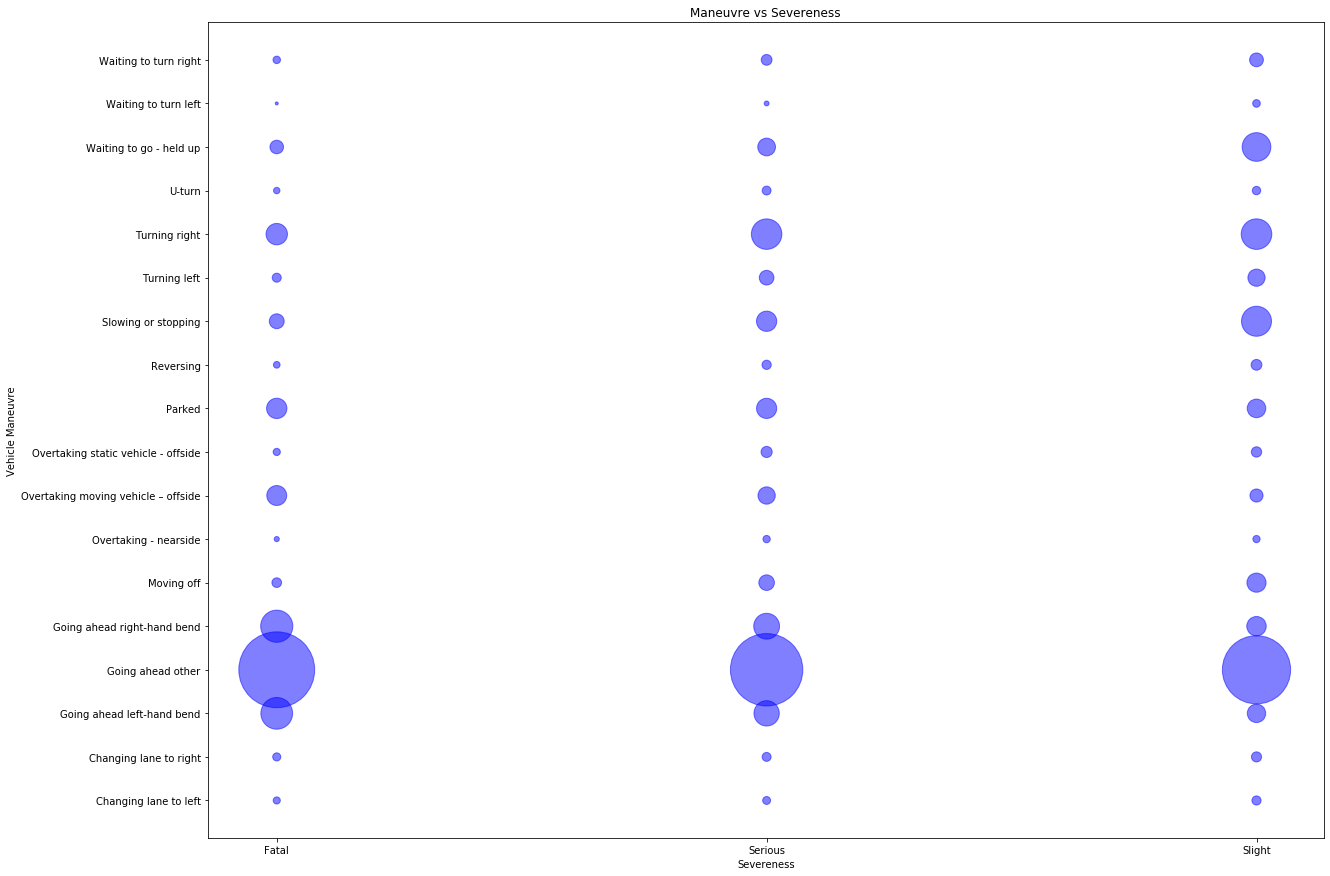

In [68]:
df_group = df.groupby(by=['Accident_Severity', 'Vehicle_Manoeuvre'])\
                    .size().reset_index(name='count')
df_group['count'] = df_group.apply(lambda x: 100 * x['count'] / np.sum(
    df_group[df_group['Accident_Severity'] == x['Accident_Severity']]['count']
), axis=1)
plt.figure(figsize=(20, 15))
plt.scatter(df_group['Accident_Severity'], df_group['Vehicle_Manoeuvre'], s = 100 * df_group['count'], facecolors='none',
            c='b', label='Count', alpha=0.5)
#lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=15)
#lgnd.legendHandles[0]._sizes = [30]
plt.title("Maneuvre vs Severeness")
plt.xlabel("Severeness")
plt.ylabel("Vehicle Maneuvre")
plt.show()

Text(0, 0.5, 'Speed limit (km/h)')

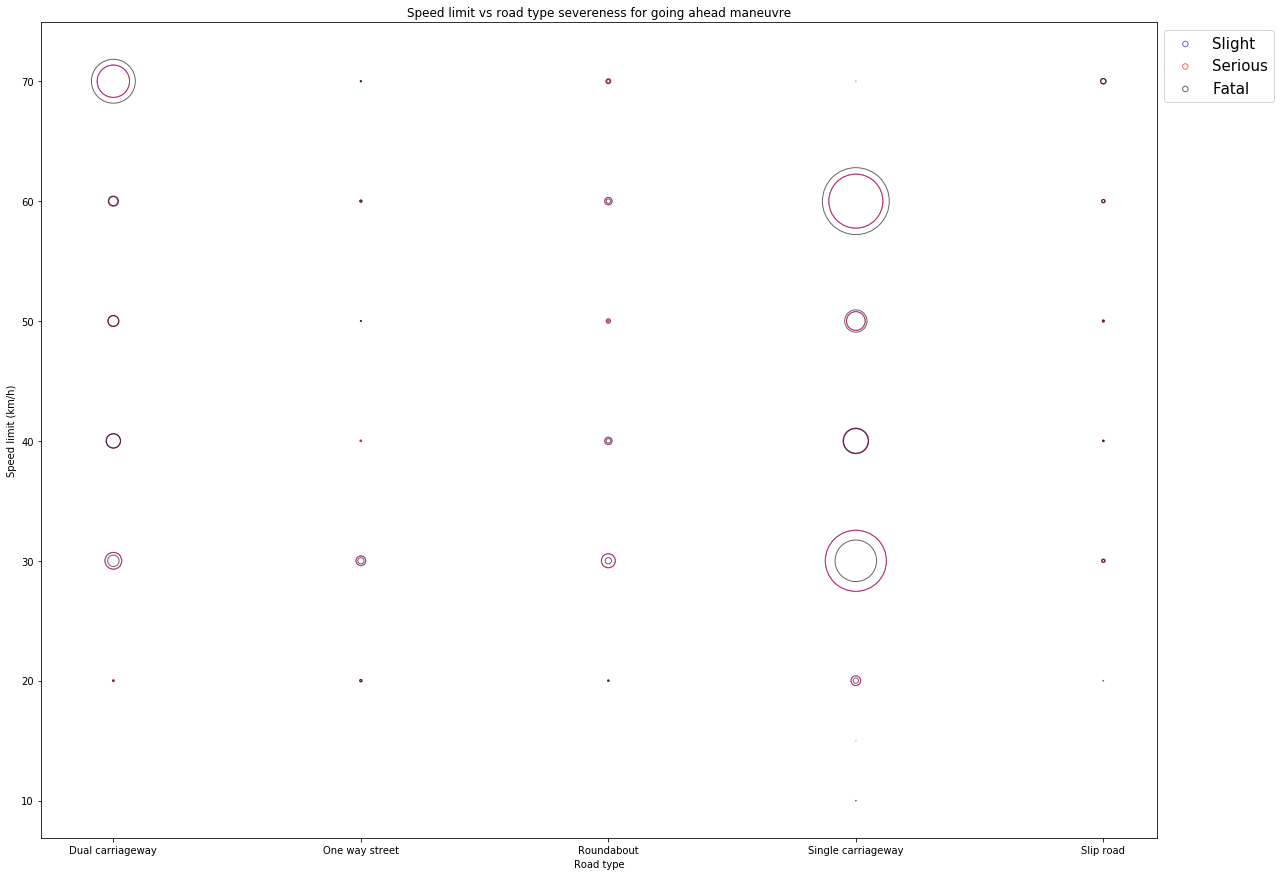

In [90]:
df_group = df.loc[
    ((df['Vehicle_Manoeuvre'] == 'Going ahead other') |
    (df['Vehicle_Manoeuvre'] == 'Going ahead right-hand bend') |
    (df['Vehicle_Manoeuvre'] == 'Going ahead left-hand bend')) 
]
df_group = df_group.groupby(by=['Accident_Severity', 'Road_Type', 'Speed_limit'])\
                    .size().reset_index(name='count')

df_group['count'] = df_group.apply(lambda x: 100 * x['count'] / np.sum(
    df_group[df_group['Accident_Severity'] == x['Accident_Severity']]['count']
), axis=1)

df_ser = df_group[df_group['Accident_Severity'] == 'Serious']
df_fatal = df_group[df_group['Accident_Severity'] == 'Fatal']

plt.figure(figsize=(20, 15))
plt.scatter(df_ser['Road_Type'], df_ser['Speed_limit'], s = 100 * df_ser['count'], facecolors='none',
            edgecolors='b', alpha=0.6, label="Slight")
plt.scatter(df_ser['Road_Type'], df_ser['Speed_limit'], s = 100 * df_ser['count'], facecolors='none',
            edgecolors='r', alpha=0.6, label="Serious")
plt.scatter(df_fatal['Road_Type'], df_fatal['Speed_limit'], s = 100 * df_fatal['count'], facecolors='none',
            edgecolors='k', alpha=0.6, label="Fatal")
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=15, bbox_to_anchor=(1.0, 1.0))
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.title("Speed limit vs road type severeness for going ahead maneuvre")
plt.xlabel("Road type")
plt.ylabel("Speed limit (km/h)")


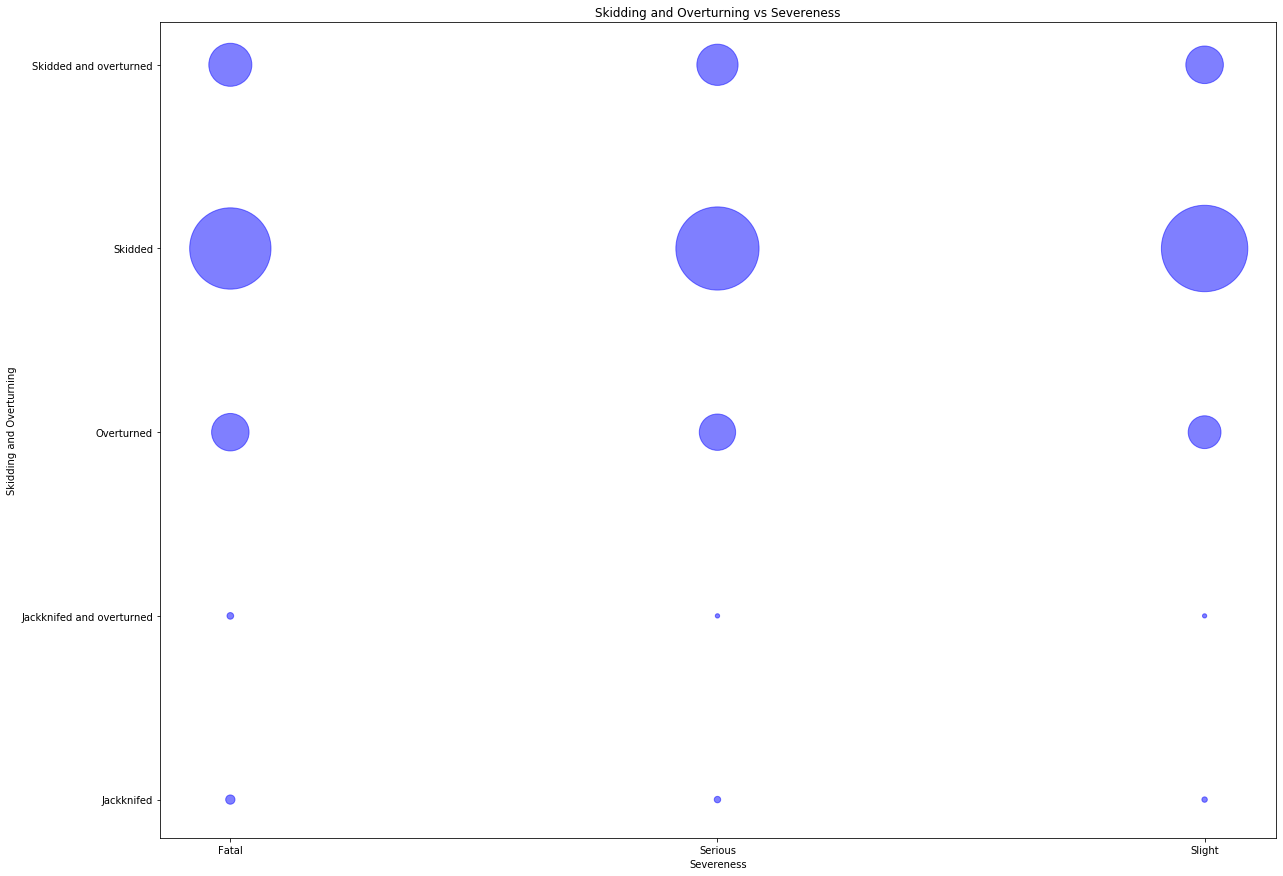

In [26]:
df_group = df.groupby(by=['Accident_Severity', 'Skidding_and_Overturning'])\
                    .size().reset_index(name='count')
df_group = df_group.loc[df_group['Skidding_and_Overturning'] != 'None']
df_group['count'] = df_group.apply(lambda x: 100 * x['count'] / np.sum(
    df_group[df_group['Accident_Severity'] == x['Accident_Severity']]['count']
), axis=1)
plt.figure(figsize=(20, 15))
plt.scatter(df_group['Accident_Severity'], df_group['Skidding_and_Overturning'], s = 100 * df_group['count'], facecolors='none',
            c='b', label='Count', alpha=0.5)
#lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=15)
#lgnd.legendHandles[0]._sizes = [30]
plt.title("Skidding and Overturning vs Severeness")
plt.xlabel("Severeness")
plt.ylabel("Skidding and Overturning")
plt.show()

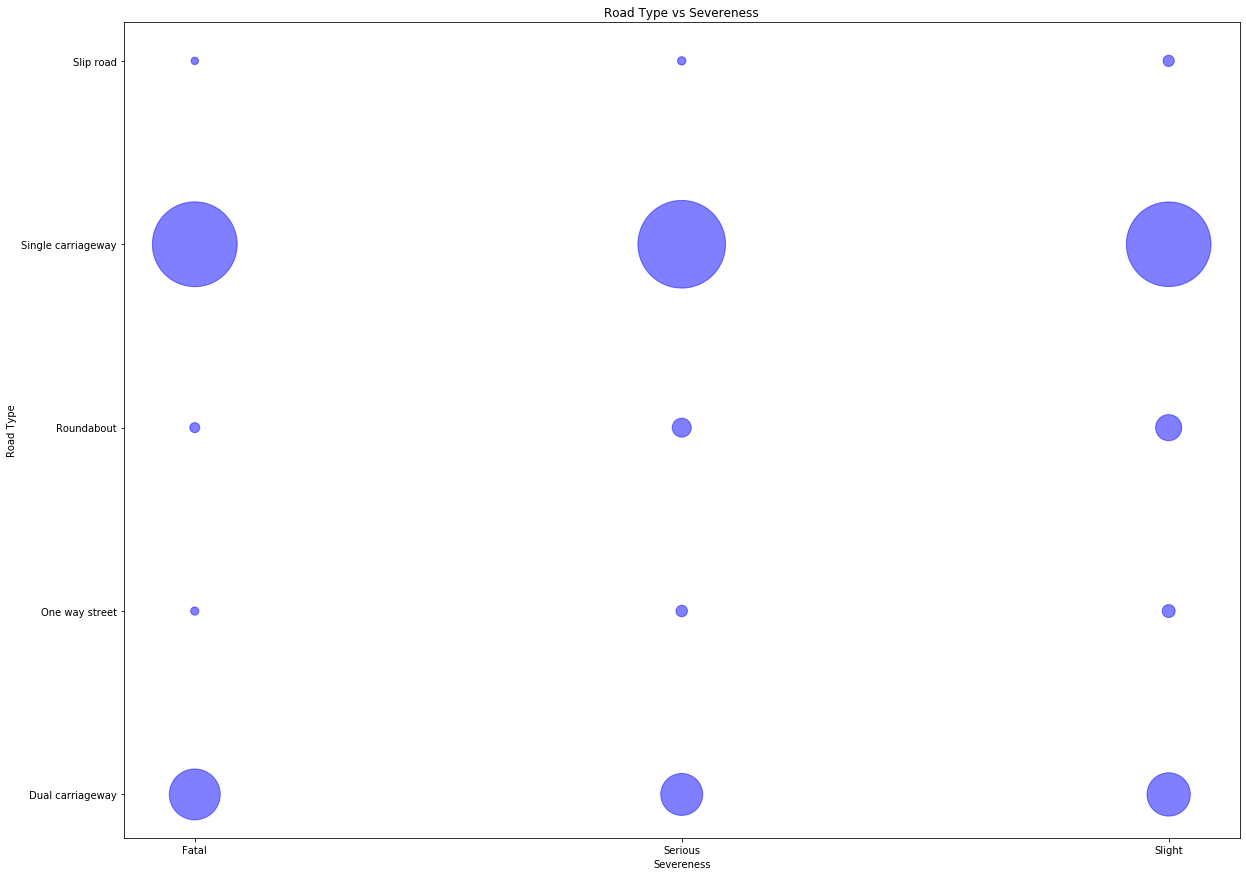

In [27]:
df_group = df.groupby(by=['Accident_Severity', 'Road_Type'])\
                    .size().reset_index(name='count')
df_group['count'] = df_group.apply(lambda x: 100 * x['count'] / np.sum(
    df_group[df_group['Accident_Severity'] == x['Accident_Severity']]['count']
), axis=1)
plt.figure(figsize=(20, 15))
plt.scatter(df_group['Accident_Severity'], df_group['Road_Type'], s = 100 * df_group['count'], facecolors='none',
            c='b', label='Count', alpha=0.5)
#lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=15)
#lgnd.legendHandles[0]._sizes = [30]
plt.title("Road Type vs Severeness")
plt.xlabel("Severeness")
plt.ylabel("Road Type")
plt.show()

## Accident and Rating Analysis

#### Skid/overturn vs Road type vs Rating given Severeness

In [120]:
df_group = df[['Skidding_and_Overturning', 'Road_Type', 'Accident_Severity', 'OVERALL_STARS']]
# df_group = df_group.dropna(axis=0)
df_group = df_group.loc[df_group['Accident_Severity'] != 'Slight']
df_group = df_group.loc[df_group['Skidding_and_Overturning'] != 'None']
df_group = df_group.groupby(by=['Skidding_and_Overturning', 'Road_Type', 'Accident_Severity', 
                          'OVERALL_STARS']).size().reset_index(name='count')
df_group['count'] = df_group.apply(lambda x: 100 * x['count'] / np.sum(
    df_group.loc[(df_group['Skidding_and_Overturning'] == x['Skidding_and_Overturning']) & 
                 (df_group['Road_Type'] == x['Road_Type'])]['count']
), axis=1)

df_ser = df_group.loc[df_group['Accident_Severity'] == 'Serious']
df_fatal = df_group.loc[df_group['Accident_Severity'] == 'Fatal']

4.0    7
5.0    6
3.0    4
Name: OVERALL_STARS, dtype: int64


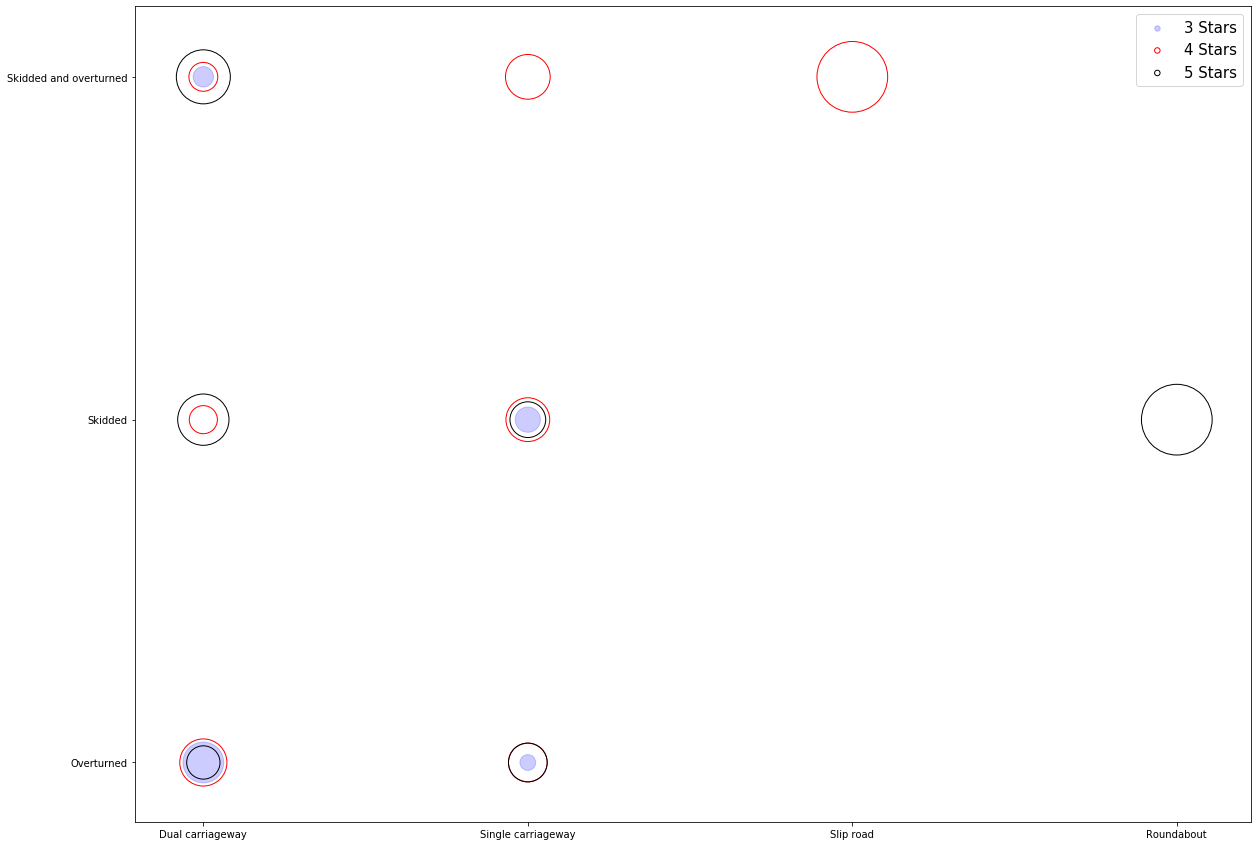

In [121]:
print(df_ser['OVERALL_STARS'].value_counts())
plt.figure(figsize=(20, 15))
#ser_three = ws_ser.loc[(ws_ser['OVERALL_STARS'] < 3.4) & (ws_ser['OVERALL_STARS'] > 3.2)]
ser_three = df_ser[df_ser['OVERALL_STARS'] == 3]
ser_four = df_ser[df_ser['OVERALL_STARS'] == 4]
ser_five = df_ser[df_ser['OVERALL_STARS'] == 5]
plt.scatter(ser_three['Road_Type'], ser_three['Skidding_and_Overturning'], s = 50 * ser_three['count'], facecolors='none',
            c='b', label='3 Stars', alpha=0.2)
plt.scatter(ser_four['Road_Type'], ser_four['Skidding_and_Overturning'], s = 50 * ser_four['count'], facecolors='none',
            edgecolors='r', label='4 Stars')
plt.scatter(ser_five['Road_Type'], ser_five['Skidding_and_Overturning'], s = 50 * ser_five['count'], facecolors='none',
            edgecolors='k', label='5 Stars')
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=15)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.show()

4.0    5
5.0    3
3.0    1
Name: OVERALL_STARS, dtype: int64


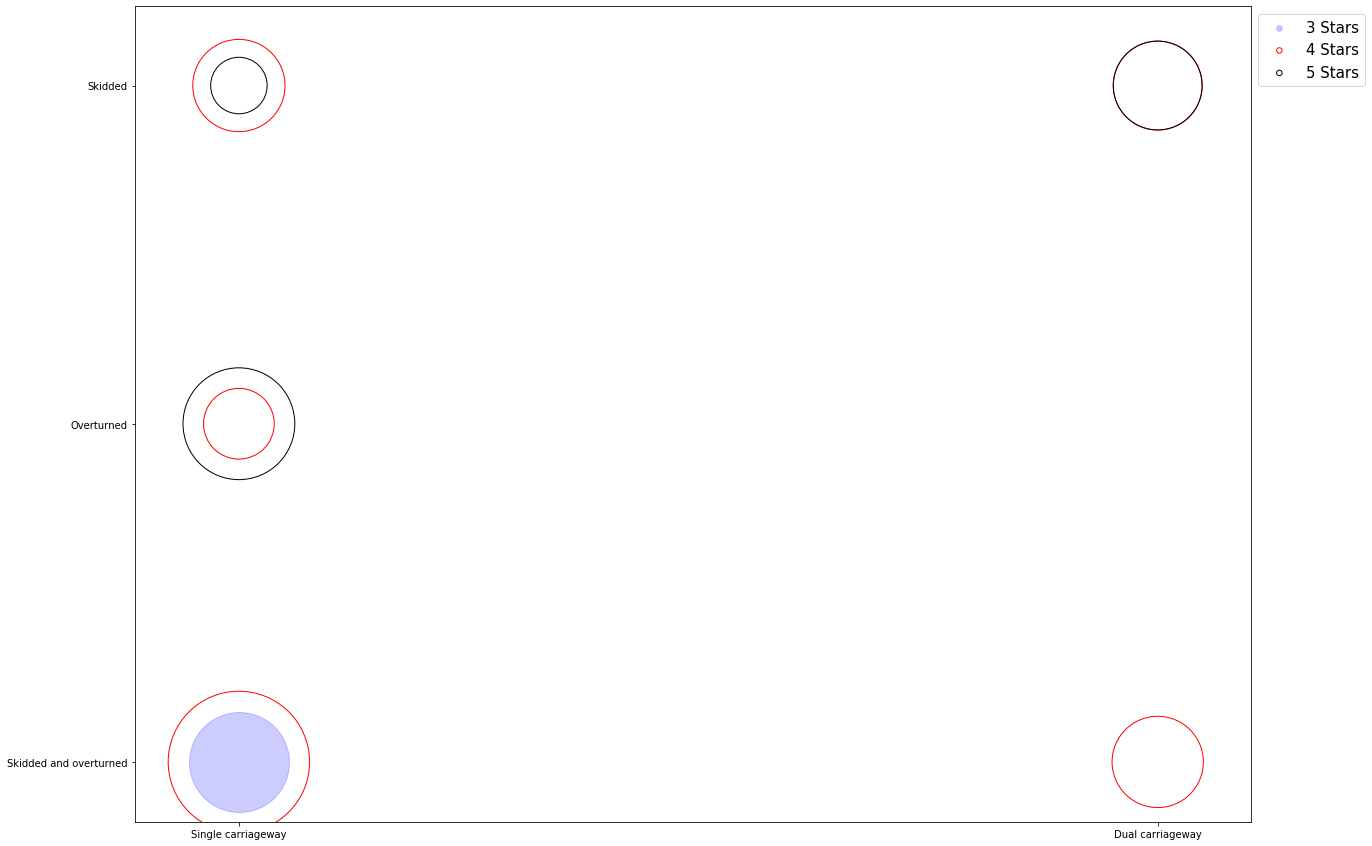

In [122]:
print(df_fatal['OVERALL_STARS'].value_counts())
plt.figure(figsize=(20, 15))
# ser_three = ws_fatal.loc[(ws_fatal['OVERALL_STARS'] < 3.4) & (ws_fatal['OVERALL_STARS'] > 3.2)]
ser_three = df_fatal[df_fatal['OVERALL_STARS'] == 3]
ser_four = df_fatal[df_fatal['OVERALL_STARS'] == 4]
ser_five = df_fatal[df_fatal['OVERALL_STARS'] == 5]
plt.scatter(ser_three['Road_Type'], ser_three['Skidding_and_Overturning'], s = 500 * ser_three['count'], facecolors='none',
            c='b', label='3 Stars', alpha=0.2)
plt.scatter(ser_four['Road_Type'], ser_four['Skidding_and_Overturning'], s = 500 * ser_four['count'], facecolors='none',
            edgecolors='r', label='4 Stars')
plt.scatter(ser_five['Road_Type'], ser_five['Skidding_and_Overturning'], s = 500 * ser_five['count'], facecolors='none',
            edgecolors='k', label='5 Stars')
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=15, bbox_to_anchor=(1.0, 1.0))
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.show()

#### Manuevre vs road type vs rating, given severeness

In [144]:
df_group = df[['Vehicle_Manoeuvre', 'Road_Type', 'Accident_Severity', 'OVERALL_STARS']]
# df_group = df_group.dropna(axis=0)
df_group = df_group.loc[df_group['Accident_Severity'] != 'Slight']
df_group = df_group.groupby(by=['Vehicle_Manoeuvre', 'Road_Type', 'Accident_Severity', 
                          'OVERALL_STARS']).size().reset_index(name='count')
df_group['count'] = df_group.apply(lambda x: 100 * x['count'] / np.sum(
    df_group[
        (df_group['Vehicle_Manoeuvre'] == x['Vehicle_Manoeuvre']) &
        (df_group['Road_Type'] == x['Road_Type']) &
        (df_group['Accident_Severity'] == x['Accident_Severity'])
    ]['count']
), axis=1)
df_ser = df_group.loc[df_group['Accident_Severity'] == 'Serious']
df_fatal = df_group.loc[df_group['Accident_Severity'] == 'Fatal']

5.0    26
4.0    24
3.0     5
Name: OVERALL_STARS, dtype: int64


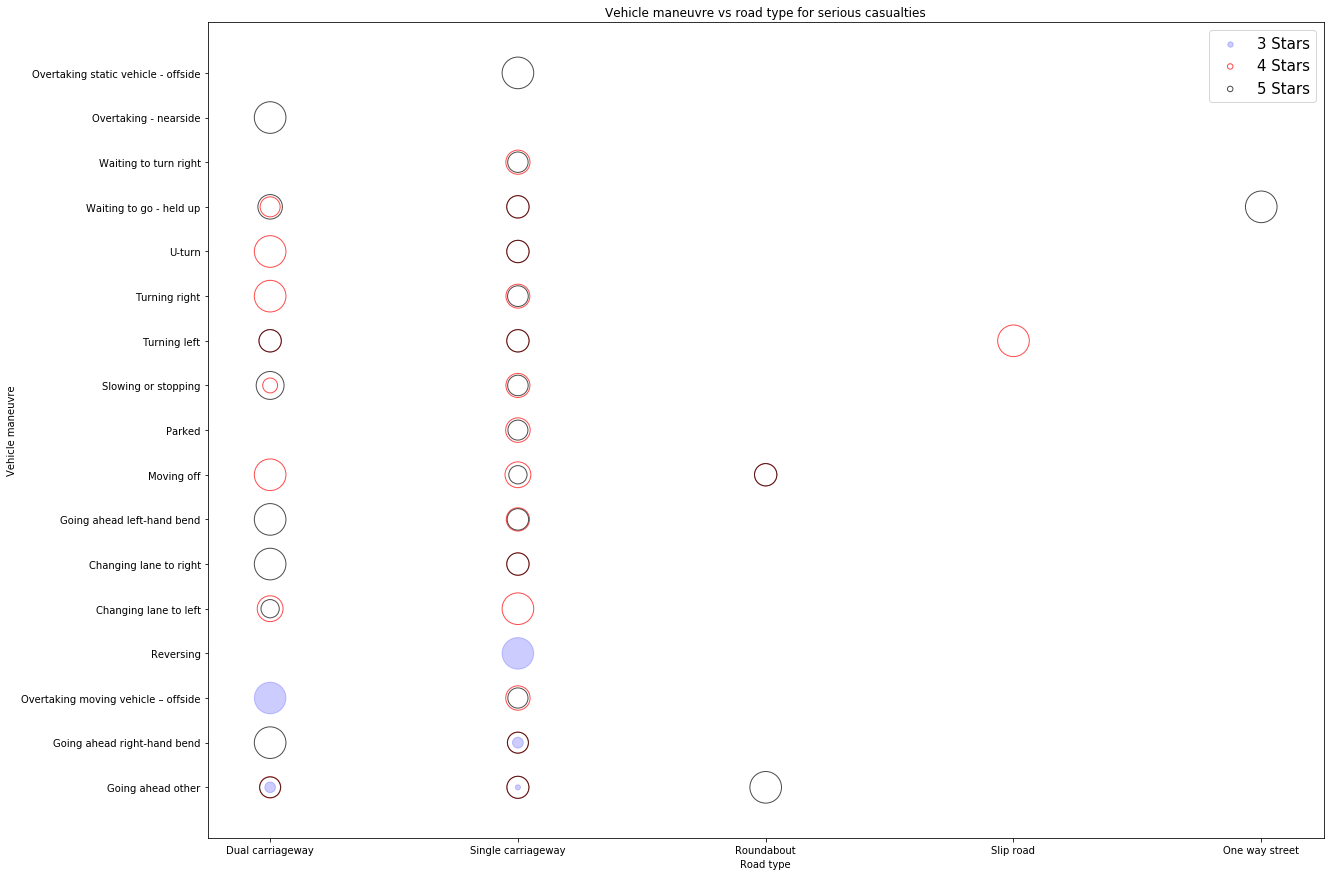

In [139]:
print(df_ser['OVERALL_STARS'].value_counts())
plt.figure(figsize=(20, 15))
#ser_three = ws_ser.loc[(ws_ser['OVERALL_STARS'] < 3.4) & (ws_ser['OVERALL_STARS'] > 3.2)]
ser_three = df_ser[df_ser['OVERALL_STARS'] == 3]
ser_four = df_ser[df_ser['OVERALL_STARS'] == 4]
ser_five = df_ser[df_ser['OVERALL_STARS'] == 5]
plt.scatter(ser_three['Road_Type'], ser_three['Vehicle_Manoeuvre'], s = 10 * ser_three['count'], facecolors='none',
            c='b', label='3 Stars', alpha=0.2)
plt.scatter(ser_four['Road_Type'], ser_four['Vehicle_Manoeuvre'], s = 10 * ser_four['count'], facecolors='none',
            edgecolors='r', alpha=0.7, label='4 Stars')
plt.scatter(ser_five['Road_Type'], ser_five['Vehicle_Manoeuvre'], s = 10 * ser_five['count'], facecolors='none',
            edgecolors='k', alpha=0.7, label='5 Stars')
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=15)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.title("Vehicle maneuvre vs road type for serious casualties")
plt.xlabel("Road type")
plt.ylabel("Vehicle maneuvre")
plt.show()

5.0    7
4.0    5
3.0    1
Name: OVERALL_STARS, dtype: int64


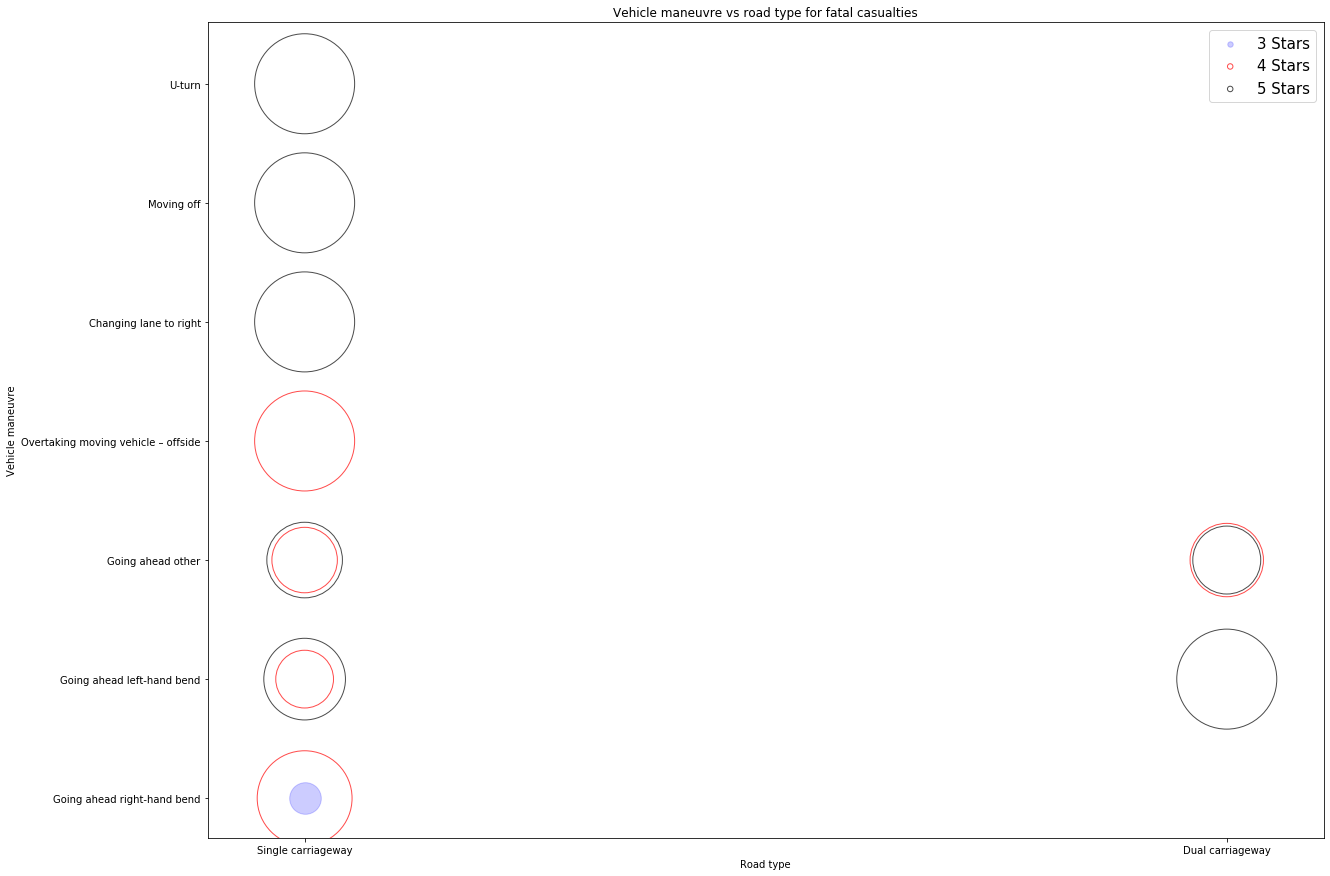

In [142]:
print(df_fatal['OVERALL_STARS'].value_counts())
plt.figure(figsize=(20, 15))
#ser_three = ws_ser.loc[(ws_ser['OVERALL_STARS'] < 3.4) & (ws_ser['OVERALL_STARS'] > 3.2)]
ser_three = df_fatal[df_fatal['OVERALL_STARS'] == 3]
ser_four = df_fatal[df_fatal['OVERALL_STARS'] == 4]
ser_five = df_fatal[df_fatal['OVERALL_STARS'] == 5]
plt.scatter(ser_three['Road_Type'], ser_three['Vehicle_Manoeuvre'], s = 100 * ser_three['count'], facecolors='none',
            c='b', label='3 Stars', alpha=0.2)
plt.scatter(ser_four['Road_Type'], ser_four['Vehicle_Manoeuvre'], s = 100 * ser_four['count'], facecolors='none',
            edgecolors='r', alpha=0.7, label='4 Stars')
plt.scatter(ser_five['Road_Type'], ser_five['Vehicle_Manoeuvre'], s = 100 * ser_five['count'], facecolors='none',
            edgecolors='k', alpha=0.7, label='5 Stars')
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=15)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.title("Vehicle maneuvre vs road type for fatal casualties")
plt.xlabel("Road type")
plt.ylabel("Vehicle maneuvre")
plt.show()

#### Weather vs Speed (Size = rating, Color = severity)

In [141]:
ws_df = df[['Light_Conditions', 'Weather_Conditions', 'Accident_Severity', 'OVERALL_STARS']]
ws_df = ws_df.dropna(axis=0)
ws_df = ws_df.loc[ws_df['Accident_Severity'] != 'Slight']
ws_df = ws_df.groupby(by=['Light_Conditions', 'Weather_Conditions', 'Accident_Severity', 
                          'OVERALL_STARS']).size().reset_index(name='count')
ws_ser = ws_df.loc[ws_df['Accident_Severity'] == 'Serious']
ws_fatal = ws_df.loc[ws_df['Accident_Severity'] == 'Fatal']
print(ws_ser['OVERALL_STARS'].value_counts())

5.0    12
4.0    12
3.0     4
Name: OVERALL_STARS, dtype: int64


In [ ]:
plt.figure(figsize=(20, 15))
ser_three = ws_ser.loc[(ws_ser['OVERALL_STARS'] < 3.4) & (ws_ser['OVERALL_STARS'] > 3.2)]
ser_four = ws_ser[ws_ser['OVERALL_STARS'] == 3.75]
ser_five = ws_ser[ws_ser['OVERALL_STARS'] == 5]
plt.scatter(ser_three['Light_Conditions'], ser_three['Weather_Conditions'], s = 50 * ser_three['count'], facecolors='none',
            c='b', label='3 Stars', alpha=0.2)
plt.scatter(ser_four['Light_Conditions'], ser_four['Weather_Conditions'], s = 50 * ser_four['count'], facecolors='none',
            edgecolors='r', label='4 Stars')
plt.scatter(ser_five['Light_Conditions'], ser_five['Weather_Conditions'], s = 50 * ser_five['count'], facecolors='none',
            edgecolors='k', label='5 Stars')
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=15)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.show()

In [ ]:
plt.figure(figsize=(20, 15))
ser_three = ws_fatal.loc[(ws_fatal['OVERALL_STARS'] < 3.4) & (ws_fatal['OVERALL_STARS'] > 3.2)]
ser_four = ws_fatal[ws_fatal['OVERALL_STARS'] == 3.75]
ser_five = ws_fatal[ws_fatal['OVERALL_STARS'] == 5]
plt.scatter(ser_three['Light_Conditions'], ser_three['Weather_Conditions'], s = 50 * ser_three['count'], facecolors='none',
            c='b', label='3 Stars', alpha=0.5)
plt.scatter(ser_four['Light_Conditions'], ser_four['Weather_Conditions'], s = 50 * ser_four['count'], facecolors='none',
            edgecolors='r', label='4 Stars')
plt.scatter(ser_five['Light_Conditions'], ser_five['Weather_Conditions'], s = 50 * ser_five['count'], facecolors='none',
            edgecolors='k', label='5 Stars')
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=15)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.show()

#### Point of impact vs speed limit

In [ ]:
ps_df = df[['1st_Point_of_Impact', 'Speed_limit', 'Accident_Severity', 'OVERALL_FRNT_STARS', 'OVERALL_SIDE_STARS']]
ps_df = ps_df.dropna(axis=0)
ps_df['1st_Point_of_Impact'] = ps_df['1st_Point_of_Impact'].astype(str)
ps_df = ps_df.loc[ps_df['Accident_Severity'] != 'Slight']
ps_df = ps_df.groupby(by=['1st_Point_of_Impact', 'Speed_limit', 'Accident_Severity', 'OVERALL_FRNT_STARS']).size().reset_index(name='count')
ps_ser = ps_df.loc[ps_df['Accident_Severity'] == 'Serious']
ps_fatal = ps_df.loc[ps_df['Accident_Severity'] == 'Fatal']
print(ps_df['OVERALL_FRNT_STARS'].value_counts())


In [ ]:
ps_ser

In [ ]:
plt.figure(figsize=(20, 15))
ser_three = ps_ser[ps_ser['OVERALL_FRNT_STARS'] == 3]
ser_four = ps_ser[ps_ser['OVERALL_FRNT_STARS'] == 4]
ser_five = ps_ser[ps_ser['OVERALL_FRNT_STARS'] == 5]
plt.scatter(ser_three['Speed_limit'], ser_three['1st_Point_of_Impact'], s = 50 * ser_three['count'], facecolors='none',
            c='b', label='3 Stars', alpha=0.5)
plt.scatter(ser_four['Speed_limit'], ser_four['1st_Point_of_Impact'], s = 50 * ser_four['count'], facecolors='none',
            edgecolors='r', label='4 Stars')
plt.scatter(ser_five['Speed_limit'], ser_five['1st_Point_of_Impact'], s = 50 * ser_five['count'], facecolors='none',
            edgecolors='k', label='5 Stars')
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=15)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.show()

In [ ]:
plt.figure(figsize=(20, 15))
ser_three = ps_fatal[ps_fatal['OVERALL_FRNT_STARS'] == 3]
ser_four = ps_fatal[ps_fatal['OVERALL_FRNT_STARS'] == 4]
ser_five = ps_fatal[ps_fatal['OVERALL_FRNT_STARS'] == 5]
plt.scatter(ser_three['Speed_limit'], ser_three['1st_Point_of_Impact'], s = 50 * ser_three['count'], facecolors='none',
            c='b', label='3 Stars', alpha=0.5)
plt.scatter(ser_four['Speed_limit'], ser_four['1st_Point_of_Impact'], s = 50 * ser_four['count'], facecolors='none',
            edgecolors='r', label='4 Stars')
plt.scatter(ser_five['Speed_limit'], ser_five['1st_Point_of_Impact'], s = 50 * ser_five['count'], facecolors='none',
            edgecolors='k', label='5 Stars')
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=15)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.show()

In [ ]:
# severity distributions
severity_dist = {}
for rating in ['3', '4', '5']:
    severity_dist[rating] = [x for x in df_frnt[df_frnt['FRNT_DRIV_STARS'] == rating]['Accident_Severity']]
    severity_dist[rating] = np.unique(severity_dist[rating], return_counts=True)

In [ ]:
severity_dist

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
x = np.arange(3)
bar_width = 0.15
star_3_shares = np.round(severity_dist['3'][1] / np.sum(severity_dist['3'][1]) * 100, 2)
star_4_shares = np.round(severity_dist['4'][1] / np.sum(severity_dist['4'][1]) * 100, 2)
star_5_shares = np.round(severity_dist['5'][1] / np.sum(severity_dist['5'][1]) * 100, 2)

b1 = ax.bar(x, [0, star_4_shares[0], star_5_shares[0]], width=bar_width)
b2 = ax.bar(x + bar_width, [star_3_shares[0], star_4_shares[1], star_5_shares[1]], 
            width=bar_width)
b3 = ax.bar(x + 2 * bar_width, [star_3_shares[1], star_4_shares[2], star_5_shares[2]], 
            width=bar_width)

# x-axis
ax.set_xticks(x + (2*bar_width) / 2)
ax.set_xticklabels(['3', '4', '5'])

#y-axis
ax.set_ylabel('Severeness percentage')
ax.set_title('Accident severeness by car safety ratings for frontal accidents')

#legend
ax.legend((b1[0], b2[0], b3[0]), ('Fatal', 'Serious', 'Slight'))

#label for each bar
def autolabel(bar):
    for b in bar:
        height = b.get_height()
        ax.text(b.get_x() + b.get_width()/2., 1.01*height,'%.2f' % height + '%', ha='center', va='bottom')

autolabel(b1)
autolabel(b2)
autolabel(b3)

### Ratings vs Severity correlation

In [ ]:
df_veh_acc = pd.merge(df_uk_accidents, df_uk_vehicles, on=['Accident_Index'], how='left')
cols = ['OVERALL_STARS', 'OVERALL_FRNT_STARS', 'FRNT_DRIV_STARS', 'FRNT_PASS_STARS', 'OVERALL_SIDE_STARS', 
         'SIDE_DRIV_STARS', 'SIDE_PASS_STARS', 'ROLLOVER_STARS','ROLLOVER_STARS_2', 'ROLLOVER_POSSIBILITY', 
         'ROLLOVER_POSSIBILITY_2', 'MODEL_YR', 'MAKE', 'MODEL']
overall_stars = overall_stars[cols]
overall_stars.rename(columns={'MAKE': 'Vehicle_Make', 'MODEL': 'Vehicle_Model', 'MODEL_YR':'Vehicle_Year'}, inplace=True)
overall_stars = pd.merge(overall_stars, df_veh_acc[['Vehicle_Make', 'Vehicle_Model', 'Vehicle_Year', 'Accident_Severity']], 
                       on=['Vehicle_Make', 'Vehicle_Model', 'Vehicle_Year'], how='left')

In [ ]:
cols = ['OVERALL_STARS', 'OVERALL_FRNT_STARS', 'FRNT_DRIV_STARS', 'FRNT_PASS_STARS', 'OVERALL_SIDE_STARS', 
         'SIDE_DRIV_STARS', 'SIDE_PASS_STARS', 'ROLLOVER_STARS','ROLLOVER_STARS_2', 'ROLLOVER_POSSIBILITY', 
         'ROLLOVER_POSSIBILITY_2', 'Accident_Severity']
stars_corr = overall_stars[cols]
stars_corr[cols] = stars_corr[cols].replace({'Not Rated': np.nan, 'Slight': 1, 'Serious': 2, 'Fatal': 3})
stars_corr = stars_corr[pd.notnull(stars_corr['Accident_Severity'])]

In [ ]:
overall_stars.pivot_table(index=['Accident_Severity'], columns='OVERALL_STARS', aggfunc='size', fill_value=0)

In [ ]:
overall_stars.pivot_table(index=['Accident_Severity'], columns='OVERALL_FRNT_STARS', aggfunc='size', fill_value=0)

In [ ]:
overall_stars.pivot_table(index=['Accident_Severity'], columns='FRNT_DRIV_STARS', aggfunc='size', fill_value=0)

In [ ]:
overall_stars.pivot_table(index=['Accident_Severity'], columns='ROLLOVER_STARS', aggfunc='size', fill_value=0)

### UK data

In [ ]:
df = pd.merge(df_uk_accidents, df_uk_vehicles, on=['Accident_Index'], how='outer')
df = pd.merge(df, df_uk_casualties, on=['Accident_Index'], how='outer')

In [ ]:
df.shape

In [ ]:
df_uk_accidents = None
df_uk_casualties = None
df_uk_vehicles = None

In [ ]:
df = df.dropna()